<a href="https://colab.research.google.com/github/hshastri/PyTorchBasics/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
# https://setosa.io/ev/image-kernels/ -> good for learning

In [168]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
# convert MNIST image files into tensor of 4 dimensions (num of images, height, width, color channel)
transform = transforms.ToTensor()

In [170]:
# Train data
train_data = datasets.MNIST(root='/ccn_data', train=True, download=True, transform=transform)

In [171]:
# test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [172]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /ccn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [173]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [174]:
pwd

'/content'

In [175]:
ls

sample_data/


In [176]:
 cd ../

/


In [177]:
ls

bin@                        etc/     mnt/                      sbin@
boot/                       home/    NGC-DL-CONTAINER-LICENSE  srv/
ccn_data/                   kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/


In [178]:
cd cnn_data

/cnn_data


In [179]:
ls

MNIST/


In [180]:
cd ../

/


In [181]:
ls

bin@                        etc/     mnt/                      sbin@
boot/                       home/    NGC-DL-CONTAINER-LICENSE  srv/
ccn_data/                   kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/


In [182]:
cd content

/content


In [183]:
 # create a small batch size of images --- 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [184]:
# define our cnn model
# describe convolutional layer and what it's doing (2 convolutional layers)
conv1 = nn.Conv2d(1, 6, 3, 1)
"""
Input channels (1):
This layer expects input with 1 channel, which usually means grayscale images like MNIST.

Output channels (6):
The layer applies 6 different filters, producing 6 output feature maps. Each filter learns to detect a different feature (like horizontal edges, vertical lines, corners, etc.).

Kernel size (3):
Each of the 6 filters is a 3×3 window. This small patch slides across the input image, scanning for patterns.

Stride (1):
This means the filter moves 1 pixel at a time, so the scanning is fine-grained.
"""
conv2 = nn.Conv2d(6, 16, 3, 1)

In [185]:
# grab 1 MNIST record/image
for i, (X_Train, y_Train) in enumerate(train_data):
  break

In [186]:
y_Train

5

In [187]:
X_Train # 1 image -> 28 rows, 28 cols

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

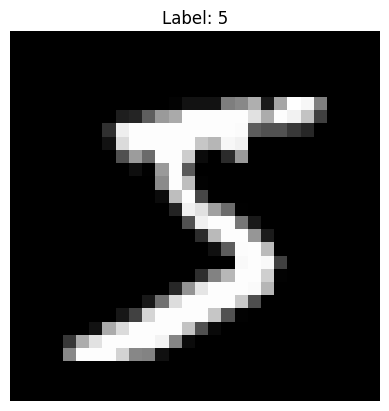

In [188]:
plt.imshow(X_Train.squeeze(), cmap='gray')
plt.title(f"Label: {y_Train}")
plt.axis('off')
plt.show()

In [189]:
x = X_Train.view(1,1,28,28)

In [190]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [191]:
# perform convolution
x = F.relu(conv1(x)) # rectified linear unit for activation function

In [192]:
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0227,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0386,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [193]:
x.shape # 1 -> image, 6 -> filters (kernels),
# dimensions -> 26 x 26 -we set up padding (no info in first 2 pizels) so the original data was 28 x 28

torch.Size([1, 6, 26, 26])

In [194]:
# pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # kernel of 2 and stride of 2

In [195]:
x.shape # 13 x 13 is the result of pooling because we have two strides.

torch.Size([1, 6, 13, 13])

In [196]:
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.1190, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0933, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0227, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1688, 0.0504,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.1010, 0.1772, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.2085, 0.2356, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.2475, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [197]:
x = F.relu(conv2(x))

In [198]:
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0322, 0.0181],
          [0.0000, 0.0000, 0.0000,  ..., 0.0434, 0.0119, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0233],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0119, 0.0168, 0.0000],
          [0.0000, 0.0000, 0.0018,  ..., 0.0350, 0.0000, 0.0000],
          [0.0000, 0.0512, 0.0195,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0303, 0.0606, 0.0758,  ..., 0.1027, 0.1080, 0.0517],
          [0.0327, 0.0613, 0.1207,  ..., 0.0866, 0.1203, 0.0697],
          [0.0299, 0.0282, 0.1426,  ..., 0.0853, 0.0738, 0.0217],
          ...,
          [0.0717, 0.0815, 0.0780,  ..., 0.0908, 0.0372, 0.0289],
          [0.1061, 0.1314, 0.1004,  ..., 0.0000, 0.0110, 0.0303],
          [0.1250, 0.1406, 0.1651,  ..., 0.0051, 0.0314, 0.0303]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [199]:
x.shape

torch.Size([1, 16, 11, 11])

In [200]:
x = F.max_pool2d(x,2,2)

In [201]:
x

tensor([[[[0.0000e+00, 3.8229e-02, 0.0000e+00, 7.4697e-02, 4.3361e-02],
          [0.0000e+00, 1.5967e-01, 1.7038e-01, 6.0644e-02, 1.1843e-01],
          [0.0000e+00, 4.5625e-02, 2.3390e-01, 2.2342e-01, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 2.5428e-02, 3.5677e-02, 6.3270e-02],
          [0.0000e+00, 4.1067e-02, 2.5190e-02, 5.9620e-02, 3.5045e-02]],

         [[6.1331e-02, 1.2073e-01, 1.3836e-01, 9.1402e-02, 1.2034e-01],
          [2.9867e-02, 1.4261e-01, 2.2605e-01, 1.4045e-01, 8.5296e-02],
          [3.0285e-02, 2.4339e-02, 1.5070e-01, 1.8471e-01, 6.4803e-02],
          [3.3162e-02, 6.7840e-02, 1.0802e-01, 2.1388e-01, 1.5645e-01],
          [1.3136e-01, 1.0931e-01, 1.1889e-01, 1.4605e-01, 9.0806e-02]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

In [202]:
x.shape

torch.Size([1, 16, 5, 5])

In [203]:
# model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    """
    In each of those, each of those mean (conv1 example):
    Input channels (1):
    This layer expects input with 1 channel, which usually means grayscale images like MNIST.

    Output channels (6):
    The layer applies 6 different filters, producing 6 output feature maps. Each filter learns to detect a different feature (like horizontal edges, vertical lines, corners, etc.).

    Kernel size (3):
    Each of the 6 filters is a 3×3 window. This small patch slides across the input image, scanning for patterns.

    Stride (1):
    This means the filter moves 1 pixel at a time, so the scanning is fine-grained.
    """
    # fully connected neural layers
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2
    # second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    #re-view to flatten it out
    X = X.view(-1, 16*5*5) # -1 -> so we can verify batch size
    # fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)



In [204]:
# Create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [205]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller the lr, the longer the model takes to train

In [206]:
len(train_loader)

6000

In [207]:
from logging import currentframe
import time
start_time = time.time()

# create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop of epochs
for i in range(epochs):
  trn_corr = 0 # train correct
  tst_corr = 0 # test correct
  #train
  for b, (X_train, y_train) in enumerate(train_loader): # each iteration -> 10 images
    b += 1 # staet our batches at 1
    y_pred = model(X_train) # get predicted  valyes from the training set
    loss = criterion(y_pred, y_train) # how off are we? compare the predictions to the correct anseer, and y_train
    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True, False = 1, 0
    """
    Example:

    y_pred = tensor([
        [1.2, 0.3, 2.1],   # model thinks class 2 is most likely
        [0.5, 2.7, 0.1],   # model thinks class 1 is most likely
        [3.1, 1.4, 0.2],   # model thinks class 0 is most likely
        [0.6, 0.9, 1.5],   # model thinks class 2 is most likely
    ])
    y_train = tensor([2, 1, 0, 0])

    # Get predicted classes
    predicted = torch.max(y_pred, 1)[1]

    # Result of torch.max(y_pred, 1):
    # torch.return_types.max(
    #     values=tensor([2.1, 2.7, 3.1, 1.5]),
    #     indices=tensor([2,   1,   0,   2])
    # )

    # So:
    # predicted = tensor([2, 1, 0, 2])

    # Compare to ground truth:
    # predicted == y_train → tensor([True, True, True, False])
    # Correct predictions: (True = 1, False = 0) → sum = 3
    """

    trn_corr += batch_corr # keep track as we go along in training
    # update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print results
    if b % 600 == 0: # 1 batch = 10 images, and we have 60,000 images (6000 batches)
      print(f"Epoch: {i}, Batch: {b} Loss: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #test
  with torch.no_grad(): # no gradient so that we don't update weights and biases
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # adding up correct predictions
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total_time = current_time - start_time
print(f"Training took: {total_time / 60} minutes!")

Epoch: 0, Batch: 600 Loss: 0.1623610556125641
Epoch: 0, Batch: 1200 Loss: 0.1502392590045929
Epoch: 0, Batch: 1800 Loss: 0.4744560718536377
Epoch: 0, Batch: 2400 Loss: 0.14238706231117249
Epoch: 0, Batch: 3000 Loss: 0.007758188061416149
Epoch: 0, Batch: 3600 Loss: 0.3836284875869751
Epoch: 0, Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0, Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0, Batch: 5400 Loss: 0.0569545142352581
Epoch: 0, Batch: 6000 Loss: 0.00038789428072050214
Epoch: 1, Batch: 600 Loss: 0.005851339548826218
Epoch: 1, Batch: 1200 Loss: 0.3855525553226471
Epoch: 1, Batch: 1800 Loss: 0.004819948226213455
Epoch: 1, Batch: 2400 Loss: 0.003216963727027178
Epoch: 1, Batch: 3000 Loss: 0.0332382395863533
Epoch: 1, Batch: 3600 Loss: 0.5372857451438904
Epoch: 1, Batch: 4200 Loss: 0.04561494290828705
Epoch: 1, Batch: 4800 Loss: 0.0007510822033509612
Epoch: 1, Batch: 5400 Loss: 0.0001173773780465126
Epoch: 1, Batch: 6000 Loss: 0.14201366901397705
Epoch: 2, Batch: 600 Loss: 0.023733

In [217]:
len(train_correct) # 5 epochs

5

In [209]:
"""
Per-Epoch Testing Strategy for Model Training

This training loop evaluates the model on a test set after each epoch. This approach is ideal for
datasets like MNIST, where the dataset is large and the model requires multiple epochs to converge.

Why test after each epoch?
- Monitors training progress and generalization
- Detects overfitting or underfitting early
- Enables plotting of loss and accuracy over time
- Supports advanced features like early stopping and learning rate scheduling

Note:
- For small datasets like Iris (150 samples), testing after each epoch is unnecessary.
  In such cases, testing is typically performed once after training is complete,
  as the model converges quickly and risks overfitting with too much evaluation.

Example:
- MNIST: Use per-epoch testing
- Iris: Test only once after training

"""

'\nPer-Epoch Testing Strategy for Model Training\n\nThis training loop evaluates the model on a test set after each epoch. This approach is ideal for \ndatasets like MNIST, where the dataset is large and the model requires multiple epochs to converge.\n\nWhy test after each epoch?\n- Monitors training progress and generalization\n- Detects overfitting or underfitting early\n- Enables plotting of loss and accuracy over time\n- Supports advanced features like early stopping and learning rate scheduling\n\nNote:\n- For small datasets like Iris (150 samples), testing after each epoch is unnecessary. \n  In such cases, testing is typically performed once after training is complete, \n  as the model converges quickly and risks overfitting with too much evaluation.\n\nExample:\n- MNIST: Use per-epoch testing\n- Iris: Test only once after training\n\n'

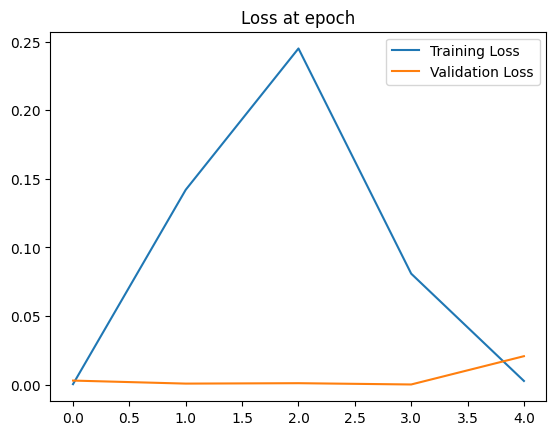

In [210]:
# graph the loss at epch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at epoch")
plt.legend()

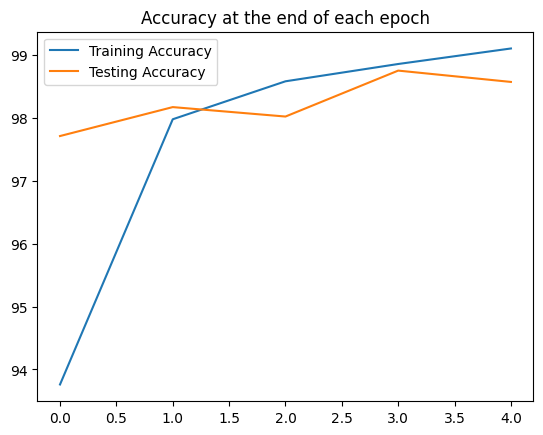

In [211]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Testing Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()


In [212]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [213]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [214]:
correct.item()

9857

In [215]:
# percentage
(correct.item() / len(test_data)) * 100

98.57000000000001

In [218]:
# grab an image
test_data[4143] # tensor with an image in it - at the end it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [219]:
# grab the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [222]:
# reshape
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

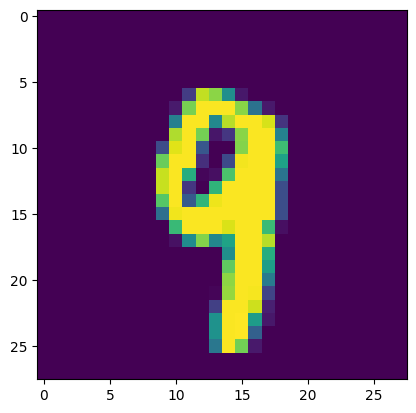

In [223]:
# show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [224]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1 , 1 color channel, 28x28 image


In [225]:
new_prediction

tensor([[-2.1693e+01, -1.8584e+01, -2.1709e+01, -1.5842e+01, -8.6330e+00,
         -1.8415e+01, -3.1769e+01, -1.2734e+01, -1.3396e+01, -1.8273e-04]])

In [226]:
new_prediction.argmax()

tensor(9)